In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [17]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

from Module.sam import sam_model_registry, SamPredictor
from Module.sam.modeling.sam import Sam
from Module.utils.util import get_device

In [12]:
device = get_device()

## Model

### Encoder

In [5]:
enc_type = "vit_t"
enc_path = "../runs/241119_vit-b_to_vit-t_DANU_WS_v2/tiny_vit_best.pth"

In [6]:
enc = sam_model_registry[enc_type](checkpoint=enc_path)

### Decoder

In [7]:
dec_type = 'vit_b'
dec_path = '../runs/241115_SAM_ViT_b_dataset_V2_ft_v1/best.pth'

In [8]:
dec = sam_model_registry[dec_type](checkpoint=dec_path)

### SAM

In [14]:
sam_model = Sam(image_encoder=enc.image_encoder,
               prompt_encoder=dec.prompt_encoder,
               mask_decoder=dec.mask_decoder)

sam_model.to(device);

In [15]:
predictor = SamPredictor(sam_model)

In [39]:
### save combined model
save_dir = os.path.split(enc_path)[0]
output_name = "SAM_vit_t_with_tuned_decoder.pth"
output_path = os.path.join(save_dir, output_name)

torch.save(sam_model.state_dict(), output_path)

## Image

(-0.5, 1246.5, 695.5, -0.5)

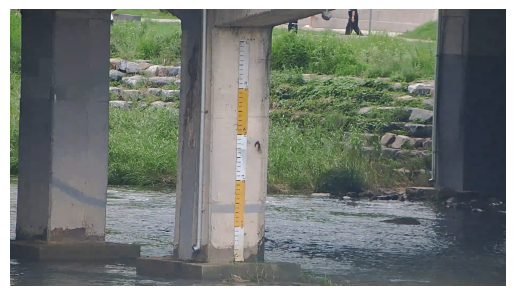

In [31]:
img_path = "../images/AY04.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

## Inference

### Run model

In [32]:
predictor.set_image(img)

masks, _, _ = predictor.predict(
    point_coords=None,
    box=None,
    multimask_output=False)

binary_mask = (masks[0, :, :] > 0).astype(np.float32)

### Visualization

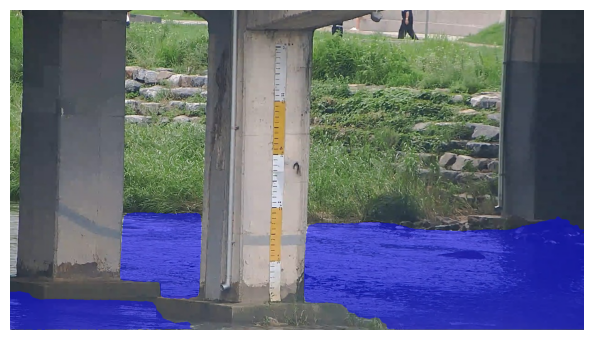

In [33]:
seg_img = img.copy()
seg_img[binary_mask==1] = (0,0,255)

transparent_img = cv2.addWeighted(img,0.5,seg_img,0.5,1.0)

plt.imshow(transparent_img)
plt.tight_layout()
plt.axis('off');